# Análisis exploratorio de los datos
## Trabajo MDS-2oTrim. ==> Inmigracion en Chile

**Profesora:** Donoso I.<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

## 1. Importar el dataset

Vamos a usar datos de la base de datos del [Departamento de Extranjeria y Migracion de Chile](http://www.extranjeria.gob.cl/estadisticas-migratorias/). 

El Departamanto de Extranjeria y Migracion de Chile, aclara que si bien las bases se presentan de manera separada por tratarse de distintos tipos de permiso, ellas no constituyen universos distintos de inmigrantes. Un inmigrante en Chile para obtener una permanencia definitiva DEBE haber obtenido con anterioridad una visa, por lo que las bases de permanencias definitivas se conforman de personas que están contabilizadas en las visas. <br>
<br>Así, para una mejor lectura de los datos haremos una distinción en términos de migración transitoria y migración permanente. Se considerará que las visas corresponden a migración transitoria, pues los permisos duran entre uno y dos años. Las personas que sean titulares de una visa, para quedarse por un plazo mayor a dos años, deben solicitar un permiso de permanencia definitiva, de otra manera deben abandonar el país.<br>
- En este trabajo focaremos en la MIGRACIÓN DEFINITIVA, que están relacionadas a las Permisos de Residencia Definitiva
- Y se complementará esa información con la migración reciente, es decir, las visas otorgadas los dos últimos años (2017/2018).

**Información Registrada**
Las planillas de permisos migratorios contienen los siguientes datos, los cuales son extraídos de los formularios establecidos para solicitar residencia, disponibles en la página web del Departamento de Extranjería y Migración:
- Sexo
- Fecha de nacimiento
- Actividad (*): refiere a la actividad que el extranjero declara realizar en nuestro país. 
- Profesión (*): refiere a la profesión que el extranjero declara al momento de realizar su solicitud.
- País
- Estudios (*): refiere al nivel de estudios que el migrante declara al momento de realizar su solicitud. 
- Comuna (*):corresponde a la comuna de residencia que declara el inmigrante al momento de realizar su solicitud y no da cuenta necesariamente de la actual residencia del extranjero
- Provincia (*): corresponde a la provincia de residencia que declara el inmigrante al momento de realizar su solicitud y no da cuenta necesariamente de la actual residencia del extranjero
- Región (*): corresponde a la región de residencia que declara el inmigrante al momento de realizar su solicitud y no da cuenta necesariamente de la actual residencia del extranjero
- Tit – Dep: se refiere a la categoría TITULAR del permiso migratorio otorgado o DEPENDIENTE en el caso que el permiso es otorgado a un familiar directo, y el dependiente lo acompaña en su residencia en Chile.
- Año: se refiere al año en que se otorga el permiso migratorio
- Beneficio: referido al permiso de residencia otorgado (tipo de visa según categoría legal: estudiante, sujeta a contrato, temporaria)

(*) Se trata de una variable con moderada tasa de registro, por lo que se sugiere utilizar con cautela la información que ella arroja. Ademas, por tratarse de información autodeclarada no se presentan medios de verificación

---
#### Los numeros finales no són una fotografia de los inmigrantes en Chile, pero se podrá analisar tendencias

In [2]:
ls

01-VISA-EDA.ipynb
02-HABIT-EDA.ipynb*
02-HABIT-EDA_MR.ipynb
03-CENSO-2017-EDA.ipynb
Inmigrantes - Glosario-Estadísticas-Final-Inst.pdf
Microdatos_Manzanas/
Presentation-Proyecto.pdf
Presentation-Proyecto.pptx
Proyecto-Magister-Data-Science.pdf
RM_PoblacionMigranteChile.pdf
data/
inmigrantes_metropolitan.xlsx
inmigrantes_rm_comuna.xlsx
~$Presentation-Proyecto.pptx


In [3]:
ls ./data

PDs-2005-2016.xlsx
PDs-2017.xlsx
PDs_2018_1.xlsx
Visas-2005-2010.xlsx
Visas-2011-2016.xlsx
Visas-2017.xlsx
Visas-2018_1.xlsx
frec_casos_dmcs_mensual_2001_2017w.xlsx
inmigrantes_metropolitana.xlsx
inmigrantes_rm_comuna.xlsx
pe_2010-2017.xlsx


In [4]:
df1 = pd.read_excel('./data/PDs-2005-2016.xlsx')
df1.shape

(324932, 12)

In [5]:
df1.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA


In [6]:
df2 = pd.read_excel('./data/PDs-2017.xlsx')
df2.shape

(87757, 12)

In [7]:
df2.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,femenino,1992-06-23,EMPLEADO,LICENCIADO,ECUADOR,UNIVERSITARIO,HUECHURABA,SANTIAGO,METROPOLITANA,T,2017,PERMANENCIA DEFINITIVA
1,masculino,1965-01-01,EMPRESARIO O PATRON,EMPRESARIO O PATRON,CHINA REPUBLICA POPULAR,UNIVERSITARIO,SAN FERNANDO,COLCHAGUA,O'HIGGINS,T,2017,PERMANENCIA DEFINITIVA


In [8]:
df3 = pd.read_excel('./data/PDs_2018_1.xlsx')
df3.shape

(48208, 12)

In [9]:
df3.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,masculino,1985-08-01,EMPLEADO,MENSAJERO,PERÚ,NO INFORMA,RECOLETA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,T,2018,OTORGA PERMANENCIA DEFINITIVA
1,masculino,2001-11-01,ESTUDIANTE,ESTUDIANTE,COLOMBIA,BASICO,INDEPENDENCIA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,D,2018,OTORGA PERMANENCIA DEFINITIVA


In [10]:
df4 = pd.read_excel('./data/Visas-2017.xlsx')
df4.shape

(267596, 12)

In [11]:
df4.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO RESUMIDO
0,masculino,1962-01-24,OTRAS ACTIVIDADES,GEOFISICO,ESTADOS UNIDOS,UNIVERSITARIO,SANTIAGO,SANTIAGO,METROPOLITANA,T,2017,TEMPORARIA
1,masculino,1973-01-04,EMPLEADO,INGENIERO,BOLIVIA,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2017,TEMPORARIA


In [12]:
df5 = pd.read_excel('./data/Visas-2018_1.xlsx', sheet_name=1)
df5.shape

(188638, 12)

In [13]:
df5.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO RESUMIDO
0,masculino,1993-02-10,INACTIVO,EMPLEADO,ARGENTINA,UNIVERSITARIO,PUCON,CAUTÍN,REGION DE LA ARAUCANIA,T,2018,TEMPORARIA
1,femenino,1976-01-20,DUEÑA DE CASA,DUEÑA DE CASA,ARGENTINA,no indica,VALDIVIA,VALDIVIA,REGION DE LOS RIOS,T,2018,TEMPORARIA


Se observa que todos los datasets tienen las mismas columnas, excepto por nombres de la columnas "FECH-NAC" y 'BENEFICIO RESUMIDO', las cuales tienen que ser cambiadas. 

In [14]:
df3.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df4.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df5.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df4.rename(columns = {'BENEFICIO RESUMIDO': 'BENEFICIO'}, inplace=True)
df5.rename(columns = {'BENEFICIO RESUMIDO': 'BENEFICIO'}, inplace=True)

Concatenar los datasets en un unico dataset

In [15]:
df = pd.concat([df1, df2])
df.shape

(412689, 12)

In [16]:
df = pd.concat([df, df3])
df.shape

(460897, 12)

In [17]:
df = pd.concat([df, df4])
df.shape

(728493, 12)

In [18]:
df = pd.concat([df, df5])
df.shape

(917131, 12)

## 2. Limpiar el dataset

In [19]:
df.head() 

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA


In [20]:
df.tail()

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
188633,masculino,1952-01-20,EMPRESARIO O PATRON,EMPRESARIO O PATRON,ARGENTINA,MEDIO,SAN ESTEBAN,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188634,masculino,1974-10-10,EMPLEADO,CHOFER,ARGENTINA,BASICO,LOS ANDES,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188635,masculino,1985-05-03,EMPLEADO,EMPLEADO,BRASIL,MEDIO,LOS ANDES,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188636,masculino,2006-05-01,ESTUDIANTE,ESTUDIANTE,ARGENTINA,BASICO,CALLE LARGA,LOS ANDES,REGION DE VALPARAISO,D,2018,TEMPORARIA
188637,masculino,2009-06-17,ESTUDIANTE,ESTUDIANTE,ARGENTINA,BASICO,CALLE LARGA,LOS ANDES,REGION DE VALPARAISO,D,2018,TEMPORARIA


In [21]:
df.rename(columns = {'AÑO': 'ANIO'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917131 entries, 0 to 188637
Data columns (total 12 columns):
SEXO          917131 non-null object
NACIMIENTO    917130 non-null datetime64[ns]
ACTIVIDAD     917131 non-null object
PROFESION     917131 non-null object
PAIS          917131 non-null object
ESTUDIOS      917131 non-null object
COMUNA        917131 non-null object
PROVINCIA     917131 non-null object
REGION        917131 non-null object
TIT_DEP       915476 non-null object
ANIO          917131 non-null int64
BENEFICIO     917131 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 91.0+ MB


El dataset tiene 917.131 observaciones y 12 caracterísiticas. 
- TIT_DEP tiene menos datos que los demas
- NACIMIENTO posue un registro sin dato

In [23]:
df.TIT_DEP.value_counts()

T    809661
D    105815
Name: TIT_DEP, dtype: int64

In [24]:
df.TIT_DEP.describe()

count     915476
unique         2
top            T
freq      809661
Name: TIT_DEP, dtype: object

In [25]:
df.TIT_DEP.isnull().sum()

1655

Hay 1655 lineas que no especifican si es titular o dependente. Por ahora, consideremos D

In [26]:
df[df.TIT_DEP.isnull()].sample(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
29196,Femenino,1999-12-28,INACTIVO,MENOR DE EDAD,ECUADOR,no indica,CHILLAN,ÑUBLE,BIOBIO,NaN,2005,PERMANENCIA DEFINITIVA
152326,masculino,2016-03-30,ESTUDIANTE,ESTUDIANTE,BOLIVIA,PREBASICO,CHILLAN VIEJO,ÑUBLE,REGION DEL BIOBIO,NaN,2018,TEMPORARIA
53168,Femenino,1978-10-31,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,no indica,CALAMA,EL LOA,ANTOFAGASTA,NaN,2006,PERMANENCIA DEFINITIVA
54441,Femenino,1990-09-15,ESTUDIANTE,ESTUDIANTE,ECUADOR,no indica,PEÑALOLEN,SANTIAGO,METROPOLITANA,NaN,2008,PERMANENCIA DEFINITIVA
29398,Femenino,1981-04-21,DUEÑA DE CASA,DUEÑA DE CASA,ARGENTINA,no indica,CALERA,QUILLOTA,VALPARAISO,NaN,2005,PERMANENCIA DEFINITIVA


In [27]:
df.TIT_DEP.fillna('D', inplace=True)

In [28]:
len(df.TIT_DEP)

917131

In [29]:
df.NACIMIENTO.isnull().sum()

1

In [30]:
df[df.NACIMIENTO.isnull()]

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
155441,Femenino,NaT,EMPLEADO,EMPLEADO,COLOMBIA,NO INFORMA,MACUL,SANTIAGO,METROPOLITANA,T,2010,PERMANENCIA DEFINITIVA


Hay 1 Titular del sexo feminino que no posue fecha de nacimiento

In [31]:
df[df.TIT_DEP == 'T'].NACIMIENTO.dt.year.describe()

count    809660.000000
mean       1982.863655
std          11.941489
min        1900.000000
25%        1976.000000
50%        1985.000000
75%        1991.000000
max        2018.000000
Name: NACIMIENTO, dtype: float64

La mediana del año de necimiento es 1985. Usaremos una fecha de ncimiento de este año. 

In [32]:
df.NACIMIENTO.fillna('1985-01-01', inplace=True)

In [33]:
df['NACIMIENTO'] = pd.to_datetime(df['NACIMIENTO'])

In [34]:
df.SEXO.value_counts()

masculino    324068
femenino     268131
Femenino     173110
Masculino    151822
Name: SEXO, dtype: int64

Se observa que hay informaciones en mayusculas y minusculas. Cambiemos todas las columnas del dataset con strings a minusculas y aprovechamos y veriquemos que no hay caracteres especiales

In [35]:
def replaceCaracteres(text):
    text = text.replace('á', 'a')
    text = text.replace('é', 'e')
    text = text.replace('í', 'i')
    text = text.replace('ó', 'o')
    text = text.replace('ú', 'u')
    text = text.replace('ñ', 'n')
    text = text.replace('ã', 'a')
    return text

In [36]:
def limpaTexto(text):
    text = text.lower()
    text = replaceCaracteres(text)
    return text 

Testemos para la columna SEXO

In [37]:
df['SEXO'] = df.SEXO.apply(limpaTexto)

In [38]:
df.SEXO.value_counts()

masculino    475890
femenino     441241
Name: SEXO, dtype: int64

Limpiemos todas las columnas con strings

In [39]:
df['ACTIVIDAD'] = df.ACTIVIDAD.apply(limpaTexto)
df['PROFESION'] = df.PROFESION.apply(limpaTexto)
df['PAIS'] = df.PAIS.apply(limpaTexto)
df['ESTUDIOS'] = df.ESTUDIOS.apply(limpaTexto)
df['COMUNA'] = df.COMUNA.apply(limpaTexto)
df['PROVINCIA'] = df.PROVINCIA.apply(limpaTexto)
df['REGION'] = df.REGION.apply(limpaTexto)
df['TIT_DEP'] = df.TIT_DEP.apply(limpaTexto)
df['BENEFICIO'] = df.BENEFICIO.apply(limpaTexto)

In [40]:
df.ACTIVIDAD.value_counts()

empleado                        518371
estudiante                      114792
empleado domestico               73514
duena de casa                    52698
obrero o jornalero               42566
inactivo                         34856
no informa                       21721
otras actividades                20866
trabajador por cuenta propia     15047
empresario o patron              10082
religioso                         7412
jubilado o pensionado             3846
rentista                           549
tripulante                         539
sin actividad                      272
Name: ACTIVIDAD, dtype: int64

In [41]:
df.PROFESION.value_counts()[0:25]

empleado             139421
estudiante            95464
asesora del hogar     70933
menor de edad         47331
duena de casa         46299
ayudante              27136
vendedor              26851
ingeniero             25164
obrero                23442
jornalero             22146
aseador               14705
no informa            13780
tecnico               13252
operario              12732
auxiliar              12731
garzon                12728
licenciado            11226
comerciante           10486
cocinero               9327
medico                 8178
profesor               7851
contador               7284
asistente              7252
agricultor             6793
otras actividades      6715
Name: PROFESION, dtype: int64

In [42]:
df.REGION.value_counts()

metropolitana                                       443285
region metropolitana de santiago                    145821
antofagasta                                          72556
tarapaca                                             38281
valparaiso                                           30057
region de valparaiso                                 18015
region de antofagasta                                14714
o'higgins                                            12283
coquimbo                                             12269
atacama                                              12265
biobio                                               12160
maule                                                11308
region del maule                                     10721
arica y parinacota                                   10532
region del libertador general bernardo o'higgins      9373
region del biobio                                     7947
region de tarapaca                                    70

In [43]:
def limpaRegiones(text):
    text = text.split(' ')
    if 'aisen' in text: text = 'aysen'
    elif 'aysen' in text: text= 'aysen'
    elif 'tarapaca' in text: text= 'tarapaca'
    elif 'bio-bio' in text: text= 'biobio'
    elif 'biobio' in text: text= 'biobio'
    elif 'metropolitana' in text: text= 'metropolitana'
    elif 'valparaiso' in text: text= 'valparaiso'
    elif 'lagos' in text: text= 'los-lagos'
    elif "o'higgins" in text: text= "o-higgins"
    elif 'araucania' in text: text= 'araucania'
    elif 'maule' in text: text= 'maule'
    elif 'coquimbo' in text: text= 'coquimbo'
    elif 'magallanes' in text: text= 'magallanes'
    elif 'antofagasta' in text: text= 'antofagasta'
    elif 'atacama' in text: text= 'atacama'
    elif 'rios' in text: text= 'los-rios'
    elif 'arica' in text: text= 'arica'
    else: text = 'Sin identificacion'
    return text 

In [44]:
df['REGION'] = df.REGION.apply(limpaRegiones)

In [45]:
df.REGION.value_counts()

metropolitana    589106
antofagasta       87270
valparaiso        48072
tarapaca          45295
maule             22029
o-higgins         21656
biobio            20107
arica             20026
coquimbo          17188
atacama           16433
los-lagos         10649
araucania          8414
magallanes         5797
los-rios           2998
aysen              2091
Name: REGION, dtype: int64

In [46]:
df.PAIS.value_counts()[0:25]

peru                       213936
venezuela                  166718
haiti                      129914
colombia                   127008
bolivia                     98400
argentina                   32456
ecuador                     29571
china republica popular     14825
espana                      13861
brasil                      12193
cuba                        10592
republica dominicana         9126
estados unidos               8149
mexico                       5174
uruguay                      5050
paraguay                     4880
francia                      4472
alemania                     2995
italia                       2648
republica de corea           1866
india                        1607
japon                        1372
canada                       1208
federacion de rusia          1048
gran bretana                 1023
Name: PAIS, dtype: int64

In [47]:
df.ESTUDIOS.value_counts()

medio            285606
no indica        230654
universitario    118509
no informa       112428
basico            94959
tecnico           50666
ninguno           14570
prebasico          9739
Name: ESTUDIOS, dtype: int64

In [48]:
df.ESTUDIOS.replace('no indica', 'no informa', inplace=True)

In [49]:
df.ESTUDIOS.replace('prebasico', 'basico', inplace=True)

In [50]:
df.ESTUDIOS.value_counts()

no informa       343082
medio            285606
universitario    118509
basico           104698
tecnico           50666
ninguno           14570
Name: ESTUDIOS, dtype: int64

In [51]:
df.BENEFICIO.value_counts()

temporaria                               449916
permanencia definitiva                   411970
otorga permanencia definitiva             48204
sujeta a contrato                          3999
estudiante                                 2319
permanencia definitiva por gracia           719
dse rechazo pede c/visa y otorga pede         4
Name: BENEFICIO, dtype: int64

In [52]:
df.BENEFICIO.replace('otorga permanencia definitiva', 'permanencia definitiva', inplace=True)
df.BENEFICIO.replace('permanencia definitiva por gracia', 'permanencia definitiva', inplace=True)
df.BENEFICIO.replace('dse rechazo pede c/visa y otorga pede', 'temporaria', inplace=True)
df.BENEFICIO.replace('sujeta a contrato', 'temporaria', inplace=True)
df.BENEFICIO.replace('estudiante', 'temporaria', inplace=True)
df.BENEFICIO.replace('permanencia definitiva', 'definitiva', inplace=True)

In [53]:
df.BENEFICIO.value_counts()

definitiva    460893
temporaria    456238
Name: BENEFICIO, dtype: int64

## 3. Analisar general de la data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917131 entries, 0 to 188637
Data columns (total 12 columns):
SEXO          917131 non-null object
NACIMIENTO    917131 non-null datetime64[ns]
ACTIVIDAD     917131 non-null object
PROFESION     917131 non-null object
PAIS          917131 non-null object
ESTUDIOS      917131 non-null object
COMUNA        917131 non-null object
PROVINCIA     917131 non-null object
REGION        917131 non-null object
TIT_DEP       917131 non-null object
ANIO          917131 non-null int64
BENEFICIO     917131 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 91.0+ MB


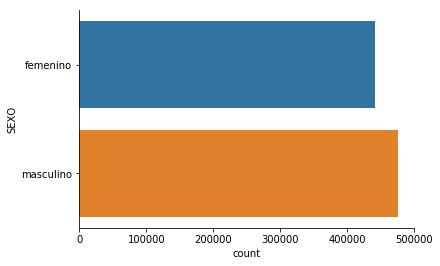

In [55]:
sns.countplot(y=df['SEXO'])
sns.despine()

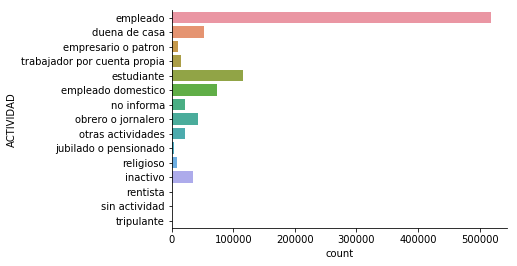

In [56]:
sns.countplot(y=df['ACTIVIDAD'])
sns.despine()

In [57]:
top_profesion = df.PROFESION.value_counts()[0:10]
top_profesion

empleado             139421
estudiante            95464
asesora del hogar     70933
menor de edad         47331
duena de casa         46299
ayudante              27136
vendedor              26851
ingeniero             25164
obrero                23442
jornalero             22146
Name: PROFESION, dtype: int64

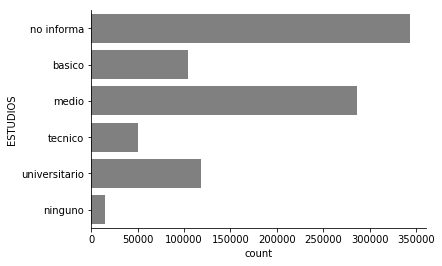

In [58]:
sns.countplot(y=df['ESTUDIOS'], color='grey')
sns.despine()

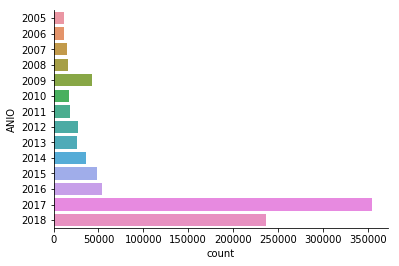

In [59]:
sns.countplot(y=df['ANIO'])
sns.despine()

In [60]:
top_paises = df.PAIS.value_counts()[0:10]
top_paises

peru                       213936
venezuela                  166718
haiti                      129914
colombia                   127008
bolivia                     98400
argentina                   32456
ecuador                     29571
china republica popular     14825
espana                      13861
brasil                      12193
Name: PAIS, dtype: int64

In [61]:
TOP_PAISES_POP = top_paises.sum()
TOT_INM = len(df.SEXO)
print("Total de Inmigrantes", TOT_INM)
print("Total de Inmigrantes dos Top10:{}, que es {}% del total".format(TOP_PAISES_POP, round((TOP_PAISES_POP/TOT_INM)*100, 0)))

Total de Inmigrantes 917131
Total de Inmigrantes dos Top10:838882, que es 91.0% del total


In [62]:
top_regiones = df.REGION.value_counts()[0:3]
top_regiones

metropolitana    589106
antofagasta       87270
valparaiso        48072
Name: REGION, dtype: int64

In [63]:
TOP_REG_POP = top_regiones.sum()
print("Total de Inmigrantes dos Top3 regiones: {}, que es {}% del total".format(TOP_REG_POP, round((TOP_REG_POP/TOT_INM)*100, 0)))

Total de Inmigrantes dos Top3 regiones: 724448, que es 79.0% del total


**Key Insight**

- 91% de los estranjeros són de 10 paises, y 
- Case 80% del total está concentrado en 3 regiones, con mas de la mitad en la Metropolitana 

In [64]:
edad = 2018 - (df.NACIMIENTO.dt.year)
edad.describe()

count    917131.000000
mean         33.084956
std          13.474518
min           0.000000
25%          25.000000
50%          32.000000
75%          41.000000
max         118.000000
Name: NACIMIENTO, dtype: float64

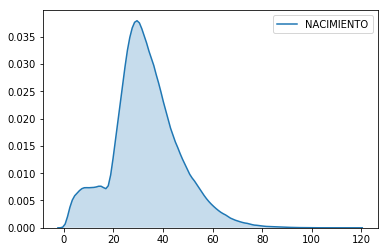

In [65]:
sns.kdeplot(edad, shade=True)

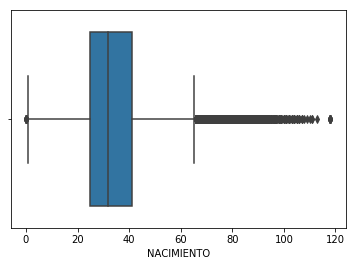

In [66]:
sns.boxplot(edad)

Hay muchos que són niños y seguro otros que ya falecerón

In [67]:
edad_titular = 2018 - (df[df.TIT_DEP =='t'].NACIMIENTO.dt.year)

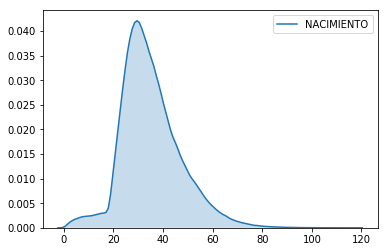

In [68]:
sns.kdeplot(edad_titular, shade=True)

In [69]:
edad_titular.describe()

count    809661.000000
mean         35.136342
std          11.941482
min           0.000000
25%          27.000000
50%          33.000000
75%          42.000000
max         118.000000
Name: NACIMIENTO, dtype: float64

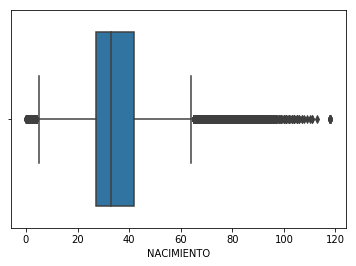

In [70]:
sns.boxplot(edad_titular)

In [71]:
(edad_titular > 100).sum()

54

In [72]:
(edad_titular < 15).sum()

22656

##### **Key Insights**

- Muy pocas personas titulares que podrian tener mas de 100 años y ademas muchos fueron permisos consedidos a mas de 10 años. Así o se puede borrar estos datos o dejarlos. No harán mucha diferencia. 
- El problema mas grande es en relación a la edad minima de los titulares, pues hay un numero significativo de personas que són titulares pero tienen menos de 15 anõs y seguro deben de ser dependentes de otros. 

## 4. Validación de los datos de Extrangería con el Censo 2017 para la RM

###  Región Metropolitana en detalles

In [73]:
metro = df[df.REGION == 'metropolitana']
metro.shape

(589106, 12)

In [74]:
metro.sample(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
105822,masculino,2011-06-18,inactivo,menor de edad,colombia,ninguno,recoleta,santiago,metropolitana,d,2017,temporaria
54671,femenino,1992-11-27,empleado,aseador,haiti,no informa,la pintana,santiago,metropolitana,t,2017,temporaria
110398,masculino,1973-04-29,obrero o jornalero,obrero,peru,medio,recoleta,santiago,metropolitana,t,2009,definitiva
33411,masculino,1939-03-31,jubilado o pensionado,jubilado o pensionado,estados unidos,no informa,el bosque,santiago,metropolitana,t,2005,definitiva
4806,femenino,2008-01-16,estudiante,estudiante,ecuador,basico,la florida,santiago,metropolitana,d,2018,definitiva


In [75]:
metro.PROVINCIA.unique()

array(['santiago', 'chacabuco', 'talagante', 'melipilla', 'cordillera',
       'maipo'], dtype=object)

### Obtener datos del Censo 2017 - Region Metropolitana

In [76]:
!ls ./data/

PDs-2005-2016.xlsx                      Visas-2018_1.xlsx
PDs-2017.xlsx                           frec_casos_dmcs_mensual_2001_2017w.xlsx
PDs_2018_1.xlsx                         inmigrantes_metropolitana.xlsx
Visas-2005-2010.xlsx                    inmigrantes_rm_comuna.xlsx
Visas-2011-2016.xlsx                    pe_2010-2017.xlsx
Visas-2017.xlsx


In [77]:
censo = pd.read_excel('./data/inmigrantes_rm_comuna.xlsx')

In [78]:
censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
COMUNA         52 non-null int64
NOM_COMUNA     52 non-null object
INMIGRANTES    52 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [79]:
censo.INMIGRANTES.sum()

457110

In [80]:
len(metro)

589106

Es lo que se esperaría, pues muchas Visas temporárias fueron sacadas entre 2017 y 2018. Para validar en detalles, hay que mirar los datasets df4 (Visas 2017) y df5 (Visas 2018 con 'mas foco')

In [81]:
censo.shape

(52, 3)

In [82]:
len(metro.COMUNA.unique())

52

Los dos datasets posuen 52 comunas

In [83]:
censo_test = censo.INMIGRANTES[0:20]

In [84]:
censo_test = censo_test.reset_index()

In [85]:
censo_test = censo_test.INMIGRANTES

In [86]:
censo_test

0     110732
1      30308
2      30023
3      23329
4      22479
5      15628
6      15578
7      15004
8      12030
9      11626
10     10667
11     10173
12      9876
13      9608
14      9330
15      9223
16      7495
17      7411
18      6916
19      6544
Name: INMIGRANTES, dtype: int64

In [92]:
metro_test = metro.COMUNA.value_counts()[0:20]

In [93]:
metro_test = metro_test.reset_index()

In [95]:
metro_test = metro_test.COMUNA

In [96]:
metro_test

0     162325
1      38888
2      37783
3      30937
4      29155
5      21176
6      19523
7      18449
8      15685
9      14020
10     12404
11     11003
12     10426
13     10391
14     10141
15      9442
16      9088
17      8879
18      8296
19      7578
Name: COMUNA, dtype: int64

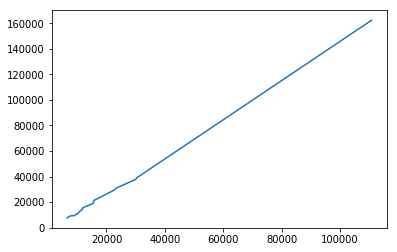

In [97]:
plt.plot(censo_test, metro_test)

In [98]:
censo_test.corr(metro_test)

0.9992184483609619

Existe una correlación case perfecta entre los dos datasets! Trabajaremos con los datos del dataset 'metro'

## 5. Analisis Datos Inmigrantes Region Metropolitana

In [99]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589106 entries, 0 to 188619
Data columns (total 12 columns):
SEXO          589106 non-null object
NACIMIENTO    589106 non-null datetime64[ns]
ACTIVIDAD     589106 non-null object
PROFESION     589106 non-null object
PAIS          589106 non-null object
ESTUDIOS      589106 non-null object
COMUNA        589106 non-null object
PROVINCIA     589106 non-null object
REGION        589106 non-null object
TIT_DEP       589106 non-null object
ANIO          589106 non-null int64
BENEFICIO     589106 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 58.4+ MB


In [100]:
metro.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,ANIO,BENEFICIO
0,femenino,1974-10-05,empleado,matrona,peru,no informa,santiago,santiago,metropolitana,t,2006,definitiva
1,masculino,1949-09-13,empleado,ingeniero,ecuador,no informa,providencia,santiago,metropolitana,t,2007,definitiva


In [101]:
metro.COMUNA.value_counts()[0:10]

santiago            162325
las condes           38888
independencia        37783
estacion central     30937
recoleta             29155
providencia          21176
nunoa                19523
quilicura            18449
quinta normal        15685
la florida           14020
Name: COMUNA, dtype: int64

In [102]:
metro.PAIS.value_counts()[0:10]

peru                       163440
venezuela                  129248
haiti                       86289
colombia                    72365
argentina                   20359
bolivia                     18707
ecuador                     18675
espana                      10253
china republica popular      9703
brasil                       8833
Name: PAIS, dtype: int64

In [103]:
metro[metro.PAIS == 'brasil'].COMUNA.value_counts()

las condes             2191
santiago               1552
providencia            1097
nunoa                   520
vitacura                323
lo barnechea            318
maipu                   248
la florida              247
quilicura               223
puente alto             202
huechuraba              165
macul                   143
recoleta                138
estacion central        122
san miguel              121
colina                  103
penalolen               101
la reina                 99
san bernardo             92
independencia            71
pudahuel                 66
quinta normal            58
la cisterna              48
san joaquin              38
conchali                 38
melipilla                38
el bosque                35
buin                     35
lampa                    35
talagante                34
lo prado                 33
cerrillos                32
cerro navia              29
pedro aguirre cerda      27
la granja                25
la pintana          

In [104]:
metro[metro.PAIS == 'brasil'].ANIO.value_counts()

2017    2892
2018    1278
2015     581
2014     519
2012     514
2013     495
2016     493
2011     386
2009     349
2010     325
2007     310
2008     276
2005     225
2006     190
Name: ANIO, dtype: int64

In [105]:
metro[metro.PAIS == 'haiti'].COMUNA.value_counts()

quilicura              11494
estacion central        8365
santiago                6158
san bernardo            5883
melipilla               4793
recoleta                3933
pedro aguirre cerda     3655
lo espejo               3561
independencia           2940
cerro navia             2600
maipu                   2161
quinta normal           2034
conchali                2006
lampa                   1640
el bosque               1590
colina                  1582
renca                   1540
la cisterna             1479
la florida              1460
paine                   1400
san ramon               1318
pudahuel                1284
cerrillos               1122
la pintana              1084
lo prado                1035
la granja               1025
san joaquin              916
san miguel               902
puente alto              803
penalolen                763
buin                     669
padre hurtado            541
talagante                539
huechuraba               520
macul         

In [106]:
metro[metro.PAIS == 'haiti'].ANIO.value_counts()

2017    42961
2018    37039
2016     3594
2015     1151
2014      741
2013      288
2011      226
2012      138
2009       56
2010       49
2008       40
2007        5
2006        1
Name: ANIO, dtype: int64

In [107]:
metro[metro.PAIS == 'venezuela'].COMUNA.value_counts()

santiago               61777
independencia           9422
nunoa                   7829
estacion central        6465
las condes              4638
san miguel              4068
providencia             3544
la florida              3510
quinta normal           3189
macul                   2419
puente alto             2025
recoleta                1971
maipu                   1832
la cisterna             1489
san bernardo            1451
quilicura               1202
san joaquin             1188
penalolen                954
huechuraba               855
pudahuel                 771
colina                   769
lampa                    642
conchali                 573
la reina                 516
lo barnechea             513
melipilla                483
lo prado                 472
cerrillos                432
renca                    413
vitacura                 406
buin                     367
el bosque                353
padre hurtado            328
penaflor                 310
cerro navia   

In [108]:
metro[metro.PAIS == 'venezuela'].ANIO.value_counts()

2017    68294
2018    53573
2016     3272
2015     1128
2014      587
2013      467
2012      437
2011      313
2010      297
2009      290
2008      161
2005      151
2006      150
2007      128
Name: ANIO, dtype: int64

In [109]:
metro[metro.PAIS == 'peru'].ANIO.value_counts()

2017    49283
2009    21816
2018    20844
2016    10487
2015     8621
2012     8071
2014     7527
2013     6813
2008     6071
2011     5736
2010     5726
2007     5301
2005     3758
2006     3386
Name: ANIO, dtype: int64

In [110]:
metro[metro.PAIS == 'argentina'].ANIO.value_counts()

2017    4677
2018    1783
2015    1574
2016    1393
2005    1369
2014    1307
2006    1256
2007    1166
2012    1140
2013    1037
2008     981
2009     941
2011     874
2010     861
Name: ANIO, dtype: int64

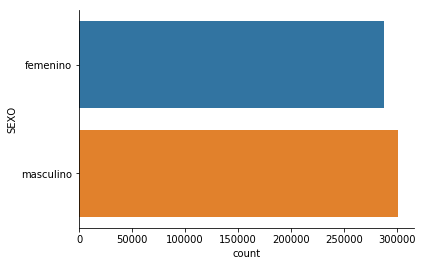

In [111]:
sns.countplot(y=metro['SEXO'])
sns.despine()

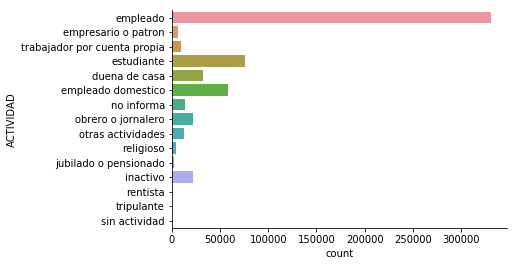

In [112]:
sns.countplot(y=metro['ACTIVIDAD'])
sns.despine()

In [113]:
top_profesion = metro.PROFESION.value_counts()[0:10]
top_profesion

empleado             75403
estudiante           59121
asesora del hogar    55115
menor de edad        33376
duena de casa        27646
ingeniero            20895
ayudante             18905
vendedor             18617
jornalero            17096
aseador              11498
Name: PROFESION, dtype: int64

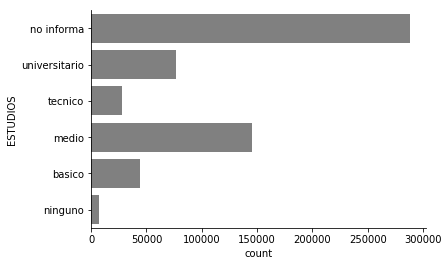

In [114]:
sns.countplot(y=metro['ESTUDIOS'], color='grey')
sns.despine()

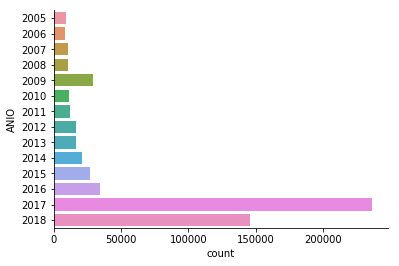

In [115]:
sns.countplot(y=metro['ANIO'])
sns.despine()

In [116]:
top_paises = metro.PAIS.value_counts()[0:10]
top_paises

peru                       163440
venezuela                  129248
haiti                       86289
colombia                    72365
argentina                   20359
bolivia                     18707
ecuador                     18675
espana                      10253
china republica popular      9703
brasil                       8833
Name: PAIS, dtype: int64

In [117]:
TOP_PAISES_POP_RM = top_paises.sum()
TOP_PAISES_POP_RM

537872

In [119]:
TOT_INM_RM = metro.PAIS.value_counts().sum()
TOT_INM_RM

589106

In [120]:
print("Total de Inmigrantes", TOT_INM_RM)
print("Total de Inmigrantes dos Top10: {}, que es {}% del total".format(TOP_PAISES_POP_RM, round((TOP_PAISES_POP_RM/TOT_INM_RM)*100, 0)))

Total de Inmigrantes 589106
Total de Inmigrantes dos Top10: 537872, que es 91.0% del total


In [122]:
top_comunas = metro.COMUNA.value_counts()[0:10]
top_comunas

santiago            162325
las condes           38888
independencia        37783
estacion central     30937
recoleta             29155
providencia          21176
nunoa                19523
quilicura            18449
quinta normal        15685
la florida           14020
Name: COMUNA, dtype: int64

In [123]:
TOP_COM_POP = top_comunas.sum()
print("Total de Inmigrantes dos Top10 comunas: {}, que es {}% del total".format(TOP_COM_POP, round((TOP_COM_POP/TOT_INM_RM)*100, 0)))

Total de Inmigrantes dos Top10 comunas: 387941, que es 66.0% del total
